In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls

 Baseline/              mar_median.xlsx             OPEN_ML/      score.xlsx
 grafico_score2.ipynb   mnar_mbouv.xlsx             score2.xlsx   UCI/
 mar_correlated.xlsx    mnar_mbov_randomness.xlsx  'Scores 2'/


In [3]:
data1 = pd.read_excel("score2.xlsx", sheet_name="Accuracy")

data1

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPR2,LPR3
0,mnar mbouv,igual,13,13,10,7,7,9,10
1,mnar mbouv,melhor,3,5,5,5,8,8,3
2,mnar mbouv,pior,24,22,25,28,25,23,27
3,mnar mbov randomness,igual,14,14,5,6,13,8,5
4,mnar mbov randomness,melhor,6,6,7,6,5,4,5
5,mnar mbov randomness,pior,20,20,28,28,22,28,30
6,mar correlated,igual,20,21,5,7,16,15,9
7,mar correlated,melhor,5,3,7,5,4,3,5
8,mar correlated,pior,15,16,28,28,20,22,26
9,mar median,igual,20,24,6,6,21,10,8


In [4]:
data1.columns

Index(['Mecanismo', 'Métrica', 'KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPR2',
       'LPR3'],
      dtype='object')

In [5]:
data1.columns = ['Mecanismo', 'Métrica', 'KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2',
       'LPMD']

data1

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPMD2,LPMD
0,mnar mbouv,igual,13,13,10,7,7,9,10
1,mnar mbouv,melhor,3,5,5,5,8,8,3
2,mnar mbouv,pior,24,22,25,28,25,23,27
3,mnar mbov randomness,igual,14,14,5,6,13,8,5
4,mnar mbov randomness,melhor,6,6,7,6,5,4,5
5,mnar mbov randomness,pior,20,20,28,28,22,28,30
6,mar correlated,igual,20,21,5,7,16,15,9
7,mar correlated,melhor,5,3,7,5,4,3,5
8,mar correlated,pior,15,16,28,28,20,22,26
9,mar median,igual,20,24,6,6,21,10,8


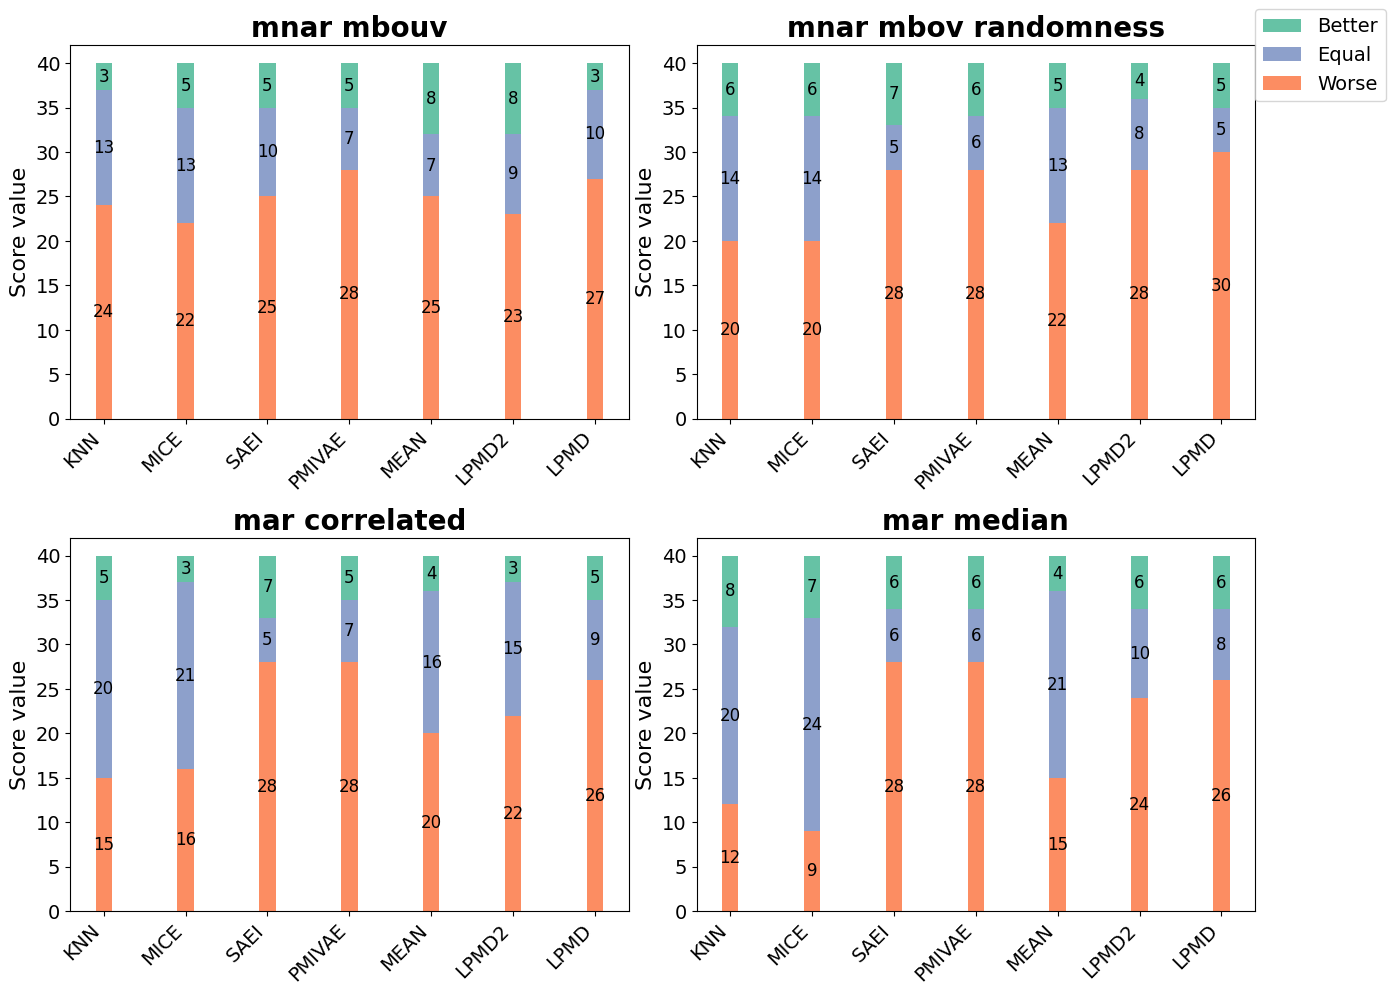

In [6]:
data = data1.copy()

# filtrando os melhores
melhores = data[data["Métrica"]=="melhor"]

# filtrando iguais
iguais = data[data["Métrica"]=="igual"]

# filtrando piores
piores = data[data["Métrica"]=="pior"]

algoritmos = ['KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2', 'LPMD']

mecanismos = ['mnar mbouv', 'mnar mbov randomness', 'mar correlated', 'mar median']

melhor = {
    'KNN':    melhores["KNN"].to_list(),
    'MICE':   melhores["MICE"].to_list(),
    'SAEI':   melhores["SAEI"].to_list(),
    'PMIVAE': melhores["PMIVAE"].to_list(),
    'MEAN':   melhores["MEAN"].to_list(),
    'LPMD2':   melhores["LPMD2"].to_list(),
    'LPMD':   melhores["LPMD"].to_list()
}

igual = {
    'KNN':    iguais["KNN"].to_list(),
    'MICE':   iguais["MICE"].to_list(),
    'SAEI':   iguais["SAEI"].to_list(),
    'PMIVAE': iguais["PMIVAE"].to_list(),
    'MEAN':   iguais["MEAN"].to_list(),
    'LPMD2':   iguais["LPMD2"].to_list(),
    'LPMD':   iguais["LPMD"].to_list()
}
igual

pior = {
    'KNN':    piores["KNN"].to_list(),
    'MICE':   piores["MICE"].to_list(),
    'SAEI':   piores["SAEI"].to_list(),
    'PMIVAE': piores["PMIVAE"].to_list(),
    'MEAN':   piores["MEAN"].to_list(),
    'LPMD2':   piores["LPMD2"].to_list(),
    'LPMD':   piores["LPMD"].to_list()
}


# Configurações gerais do gráfico
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # 4 gráficos (2x2 grid)
axes = axes.flatten()  # Flatten para iterar facilmente

bar_width = 0.2  # Largura de cada barra
bar_colors = {'melhor': '#66c2a5', 'igual': '#8da0cb', 'pior': '#fc8d62'}  # Cores

# Plotar gráficos separados para cada mecanismo
for idx, mecanismo in enumerate(mecanismos):
    ax = axes[idx]
    
    # Índice para algoritmos
    index = np.arange(len(algoritmos))  
    
    # Valores de cada métrica para o mecanismo atual
    valores_pior = [pior[alg][idx] for alg in algoritmos]
    valores_igual = [igual[alg][idx] for alg in algoritmos]
    valores_melhor = [melhor[alg][idx] for alg in algoritmos]
    
    # Empilhar as barras: primeiro "pior" na base, depois "igual", e "melhor" no topo
    bars_melhor = ax.bar(index, valores_melhor, bar_width, bottom=np.add(valores_pior, valores_igual), label='Better', color=bar_colors['melhor'])
    bars_igual = ax.bar(index, valores_igual, bar_width, bottom=valores_pior, label='Equal', color=bar_colors['igual'])
    bars_pior = ax.bar(index, valores_pior, bar_width, label='Worse', color=bar_colors['pior'])

    # Adicionar os valores no centro de cada segmento da barra
    for i, bar in enumerate(bars_melhor):
        altura_melhor = bar.get_height()
        base = valores_pior[i] + valores_igual[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_melhor / 2, 
                f'{valores_melhor[i]}', ha='center', va='center', fontsize=12)
    
    for i, bar in enumerate(bars_igual):
        altura_igual = bar.get_height()
        base = valores_pior[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_igual / 2, 
                f'{valores_igual[i]}', ha='center', va='center', fontsize=12)

    for i, bar in enumerate(bars_pior):
        altura_pior = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, altura_pior / 2, 
                f'{valores_pior[i]}', ha='center', va='center', fontsize=12)
    
    # Títulos e rótulos para cada subplot
    ax.set_title(mecanismo, fontsize=20, fontweight='bold')
    ax.set_xticks(index)
    ax.set_xticklabels(algoritmos, rotation=45, ha='right', fontsize=14)  # Aumentar tamanho da fonte dos algoritmos
    ax.set_ylabel('Score value', fontsize=16)  # Aumentar tamanho do rótulo do eixo Y
    #ax.set_xlabel('Algoritmos')
    
    # Aumentar o tamanho dos números no eixo Y
    ax.tick_params(axis='y', labelsize=14)

# Adicionar legenda compartilhada
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Ajustar o espaço para a legenda
plt.show()


# Recall

In [8]:
data2 = pd.read_excel("score2.xlsx", sheet_name="Recall")
data2

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPR2,LPR3
0,mnar mbouv,igual,11,9,4,8,7,7,11
1,mnar mbouv,melhor,5,8,15,8,10,14,5
2,mnar mbouv,pior,24,23,21,24,23,19,24
3,mnar mbov randomness,igual,7,7,3,6,11,4,6
4,mnar mbov randomness,melhor,11,11,17,10,9,13,12
5,mnar mbov randomness,pior,22,22,20,24,20,23,22
6,mar correlated,igual,13,13,3,6,12,10,11
7,mar correlated,melhor,7,6,17,9,7,9,10
8,mar correlated,pior,20,21,20,25,21,21,19
9,mar median,igual,18,15,2,5,17,7,4


In [9]:
data2.columns = ['Mecanismo', 'Métrica', 'KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2',
       'LPMD']

data2

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPMD2,LPMD
0,mnar mbouv,igual,11,9,4,8,7,7,11
1,mnar mbouv,melhor,5,8,15,8,10,14,5
2,mnar mbouv,pior,24,23,21,24,23,19,24
3,mnar mbov randomness,igual,7,7,3,6,11,4,6
4,mnar mbov randomness,melhor,11,11,17,10,9,13,12
5,mnar mbov randomness,pior,22,22,20,24,20,23,22
6,mar correlated,igual,13,13,3,6,12,10,11
7,mar correlated,melhor,7,6,17,9,7,9,10
8,mar correlated,pior,20,21,20,25,21,21,19
9,mar median,igual,18,15,2,5,17,7,4


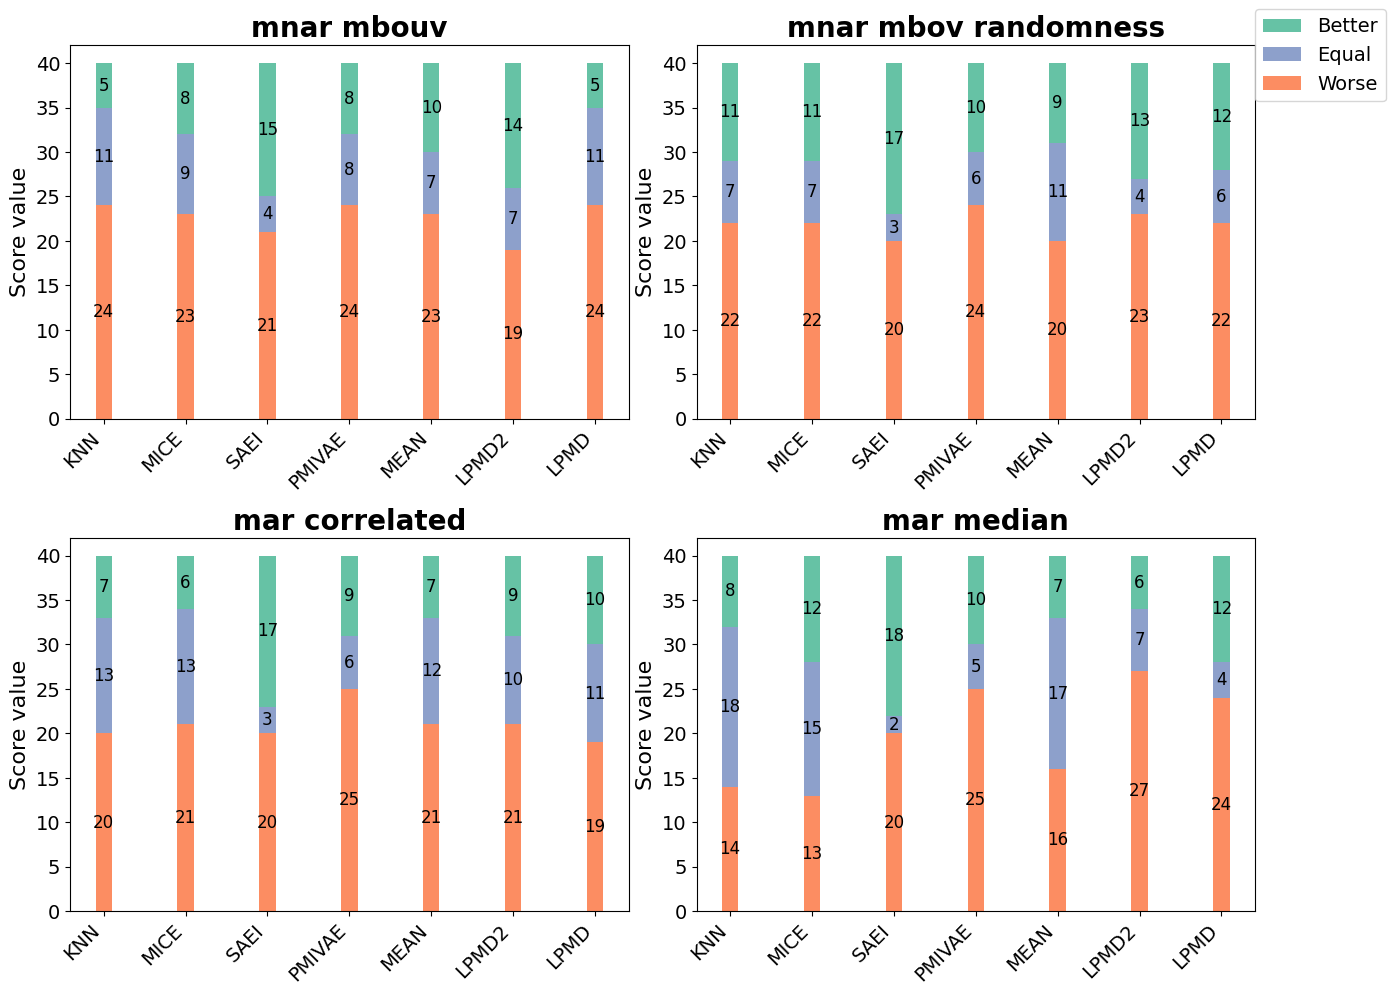

In [10]:
data = data2.copy()

# filtrando os melhores
melhores = data[data["Métrica"]=="melhor"]

# filtrando iguais
iguais = data[data["Métrica"]=="igual"]

# filtrando piores
piores = data[data["Métrica"]=="pior"]

algoritmos = ['KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2', 'LPMD']

mecanismos = ['mnar mbouv', 'mnar mbov randomness', 'mar correlated', 'mar median']

melhor = {
    'KNN':    melhores["KNN"].to_list(),
    'MICE':   melhores["MICE"].to_list(),
    'SAEI':   melhores["SAEI"].to_list(),
    'PMIVAE': melhores["PMIVAE"].to_list(),
    'MEAN':   melhores["MEAN"].to_list(),
    'LPMD2':   melhores["LPMD2"].to_list(),
    'LPMD':   melhores["LPMD"].to_list()
}

igual = {
    'KNN':    iguais["KNN"].to_list(),
    'MICE':   iguais["MICE"].to_list(),
    'SAEI':   iguais["SAEI"].to_list(),
    'PMIVAE': iguais["PMIVAE"].to_list(),
    'MEAN':   iguais["MEAN"].to_list(),
    'LPMD2':   iguais["LPMD2"].to_list(),
    'LPMD':   iguais["LPMD"].to_list()
}
igual

pior = {
    'KNN':    piores["KNN"].to_list(),
    'MICE':   piores["MICE"].to_list(),
    'SAEI':   piores["SAEI"].to_list(),
    'PMIVAE': piores["PMIVAE"].to_list(),
    'MEAN':   piores["MEAN"].to_list(),
    'LPMD2':   piores["LPMD2"].to_list(),
    'LPMD':   piores["LPMD"].to_list()
}


# Configurações gerais do gráfico
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # 4 gráficos (2x2 grid)
axes = axes.flatten()  # Flatten para iterar facilmente

bar_width = 0.2  # Largura de cada barra
bar_colors = {'melhor': '#66c2a5', 'igual': '#8da0cb', 'pior': '#fc8d62'}  # Cores

# Plotar gráficos separados para cada mecanismo
for idx, mecanismo in enumerate(mecanismos):
    ax = axes[idx]
    
    # Índice para algoritmos
    index = np.arange(len(algoritmos))  
    
    # Valores de cada métrica para o mecanismo atual
    valores_pior = [pior[alg][idx] for alg in algoritmos]
    valores_igual = [igual[alg][idx] for alg in algoritmos]
    valores_melhor = [melhor[alg][idx] for alg in algoritmos]
    
    # Empilhar as barras: primeiro "pior" na base, depois "igual", e "melhor" no topo
    bars_melhor = ax.bar(index, valores_melhor, bar_width, bottom=np.add(valores_pior, valores_igual), label='Better', color=bar_colors['melhor'])
    bars_igual = ax.bar(index, valores_igual, bar_width, bottom=valores_pior, label='Equal', color=bar_colors['igual'])
    bars_pior = ax.bar(index, valores_pior, bar_width, label='Worse', color=bar_colors['pior'])

    # Adicionar os valores no centro de cada segmento da barra
    for i, bar in enumerate(bars_melhor):
        altura_melhor = bar.get_height()
        base = valores_pior[i] + valores_igual[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_melhor / 2, 
                f'{valores_melhor[i]}', ha='center', va='center', fontsize=12)
    
    for i, bar in enumerate(bars_igual):
        altura_igual = bar.get_height()
        base = valores_pior[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_igual / 2, 
                f'{valores_igual[i]}', ha='center', va='center', fontsize=12)

    for i, bar in enumerate(bars_pior):
        altura_pior = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, altura_pior / 2, 
                f'{valores_pior[i]}', ha='center', va='center', fontsize=12)
    
    # Títulos e rótulos para cada subplot
    ax.set_title(mecanismo, fontsize=20, fontweight='bold')
    ax.set_xticks(index)
    ax.set_xticklabels(algoritmos, rotation=45, ha='right', fontsize=14)  # Aumentar tamanho da fonte dos algoritmos
    ax.set_ylabel('Score value', fontsize=16)  # Aumentar tamanho do rótulo do eixo Y
    #ax.set_xlabel('Algoritmos')
    
    # Aumentar o tamanho dos números no eixo Y
    ax.tick_params(axis='y', labelsize=14)

# Adicionar legenda compartilhada
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Ajustar o espaço para a legenda
plt.show()


# Precision

In [11]:
data3 = pd.read_excel("score2.xlsx", sheet_name="Precision")
data3

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPR2,LPR3
0,mnar mbouv,igual,13,14,7,5,13,10,13
1,mnar mbouv,melhor,3,4,7,3,8,9,6
2,mnar mbouv,pior,24,22,26,32,19,21,21
3,mnar mbov randomness,igual,17,15,3,5,14,8,8
4,mnar mbov randomness,melhor,4,7,6,3,8,6,6
5,mnar mbov randomness,pior,19,18,31,32,18,26,26
6,mar correlated,igual,21,23,9,3,19,16,13
7,mar correlated,melhor,4,4,9,5,6,6,9
8,mar correlated,pior,15,13,22,32,15,18,18
9,mar median,igual,19,19,3,3,19,15,11


In [12]:
data3.columns = ['Mecanismo', 'Métrica', 'KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2',
       'LPMD']

data3

,Mecanismo,Métrica,KNN,MICE,SAEI,PMIVAE,MEAN,LPMD2,LPMD
0,mnar mbouv,igual,13,14,7,5,13,10,13
1,mnar mbouv,melhor,3,4,7,3,8,9,6
2,mnar mbouv,pior,24,22,26,32,19,21,21
3,mnar mbov randomness,igual,17,15,3,5,14,8,8
4,mnar mbov randomness,melhor,4,7,6,3,8,6,6
5,mnar mbov randomness,pior,19,18,31,32,18,26,26
6,mar correlated,igual,21,23,9,3,19,16,13
7,mar correlated,melhor,4,4,9,5,6,6,9
8,mar correlated,pior,15,13,22,32,15,18,18
9,mar median,igual,19,19,3,3,19,15,11


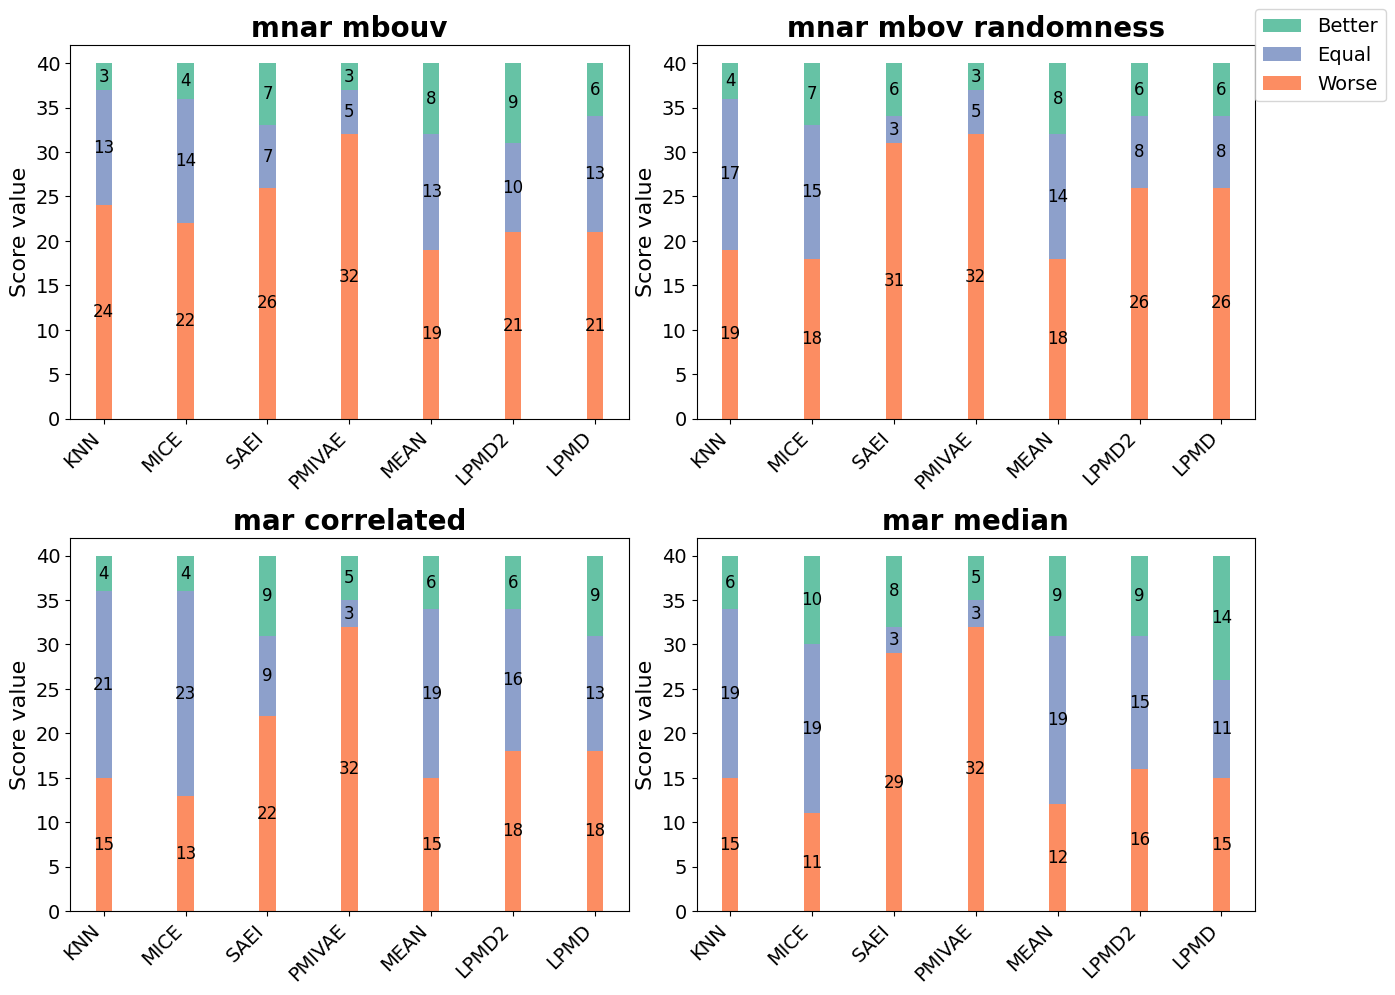

In [14]:
data = data3.copy()

# filtrando os melhores
melhores = data[data["Métrica"]=="melhor"]

# filtrando iguais
iguais = data[data["Métrica"]=="igual"]

# filtrando piores
piores = data[data["Métrica"]=="pior"]

algoritmos = ['KNN', 'MICE', 'SAEI', 'PMIVAE', 'MEAN', 'LPMD2', 'LPMD']

mecanismos = ['mnar mbouv', 'mnar mbov randomness', 'mar correlated', 'mar median']

melhor = {
    'KNN':    melhores["KNN"].to_list(),
    'MICE':   melhores["MICE"].to_list(),
    'SAEI':   melhores["SAEI"].to_list(),
    'PMIVAE': melhores["PMIVAE"].to_list(),
    'MEAN':   melhores["MEAN"].to_list(),
    'LPMD2':   melhores["LPMD2"].to_list(),
    'LPMD':   melhores["LPMD"].to_list()
}

igual = {
    'KNN':    iguais["KNN"].to_list(),
    'MICE':   iguais["MICE"].to_list(),
    'SAEI':   iguais["SAEI"].to_list(),
    'PMIVAE': iguais["PMIVAE"].to_list(),
    'MEAN':   iguais["MEAN"].to_list(),
    'LPMD2':   iguais["LPMD2"].to_list(),
    'LPMD':   iguais["LPMD"].to_list()
}
igual

pior = {
    'KNN':    piores["KNN"].to_list(),
    'MICE':   piores["MICE"].to_list(),
    'SAEI':   piores["SAEI"].to_list(),
    'PMIVAE': piores["PMIVAE"].to_list(),
    'MEAN':   piores["MEAN"].to_list(),
    'LPMD2':   piores["LPMD2"].to_list(),
    'LPMD':   piores["LPMD"].to_list()
}

# Configurações gerais do gráfico
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # 4 gráficos (2x2 grid)
axes = axes.flatten()  # Flatten para iterar facilmente

bar_width = 0.2  # Largura de cada barra
bar_colors = {'melhor': '#66c2a5', 'igual': '#8da0cb', 'pior': '#fc8d62'}  # Cores

# Plotar gráficos separados para cada mecanismo
for idx, mecanismo in enumerate(mecanismos):
    ax = axes[idx]
    
    # Índice para algoritmos
    index = np.arange(len(algoritmos))  
    
    # Valores de cada métrica para o mecanismo atual
    valores_pior = [pior[alg][idx] for alg in algoritmos]
    valores_igual = [igual[alg][idx] for alg in algoritmos]
    valores_melhor = [melhor[alg][idx] for alg in algoritmos]
    
    # Empilhar as barras: primeiro "pior" na base, depois "igual", e "melhor" no topo
    bars_melhor = ax.bar(index, valores_melhor, bar_width, bottom=np.add(valores_pior, valores_igual), label='Better', color=bar_colors['melhor'])
    bars_igual = ax.bar(index, valores_igual, bar_width, bottom=valores_pior, label='Equal', color=bar_colors['igual'])
    bars_pior = ax.bar(index, valores_pior, bar_width, label='Worse', color=bar_colors['pior'])

    # Adicionar os valores no centro de cada segmento da barra
    for i, bar in enumerate(bars_melhor):
        altura_melhor = bar.get_height()
        base = valores_pior[i] + valores_igual[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_melhor / 2, 
                f'{valores_melhor[i]}', ha='center', va='center', fontsize=12)
    
    for i, bar in enumerate(bars_igual):
        altura_igual = bar.get_height()
        base = valores_pior[i]
        ax.text(bar.get_x() + bar.get_width() / 2.0, base + altura_igual / 2, 
                f'{valores_igual[i]}', ha='center', va='center', fontsize=12)

    for i, bar in enumerate(bars_pior):
        altura_pior = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, altura_pior / 2, 
                f'{valores_pior[i]}', ha='center', va='center', fontsize=12)
    
    # Títulos e rótulos para cada subplot
    ax.set_title(mecanismo, fontsize=20, fontweight='bold')
    ax.set_xticks(index)
    ax.set_xticklabels(algoritmos, rotation=45, ha='right', fontsize=14)  # Aumentar tamanho da fonte dos algoritmos
    ax.set_ylabel('Score value', fontsize=16)  # Aumentar tamanho do rótulo do eixo Y
    #ax.set_xlabel('Algoritmos')
    
    # Aumentar o tamanho dos números no eixo Y
    ax.tick_params(axis='y', labelsize=14)

# Adicionar legenda compartilhada
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Ajustar o espaço para a legenda
plt.show()
